<img src="../images/cs_logo_pink.png" style="float: left; margin: 36px 20px 0 0; height: 60px">

# Capstone Project - Cos Skin <br><i style = "font-size:16px">Your skin but better</i>

## Notebook 5: Preprocessing
Notebook 1: Introduction & Data Collection Part 1 of 3<br>
Notebook 2: Data Collection Part 2 of 3<br>
Notebook 3: Data Collection Part 3 of 3<br>
Notebook 4: EDA & Data Cleaning<br>
<b>Notebook 5: Preprocessing<br></b>
Notebook 6: Modelling<br>
Notebook 7: App Deployment

In [1]:
# import libraries

import pandas as pd
import numpy as np 
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# import datasets
cleanser = pd.read_csv('../data/cleanser_cleaned.csv')
toner = pd.read_csv('../data/toner_cleaned.csv')
day_moisturizer = pd.read_csv('../data/day_moisturizer_cleaned.csv')
night_cream = pd.read_csv('../data/night_cream_cleaned.csv')
sunscreen = pd.read_csv('../data/sunscreen_cleaned.csv')

In [3]:
pd.set_option('display.max_columns', 500)

In this notebook, I will dummify the data so that each filter tag will be in individual columns. <br>
Next, I will look into how many products each filter tag has in order to determine whether or not they should have equal weight in my recommendation system which can be found in Notebook 6.

# Preprocessing

## One Hot Encoding

In [4]:
# Creating variables to be used in `for` loops below
categories = [cleanser, toner, day_moisturizer, night_cream, sunscreen]
categories_name = ['Cleanser', 'Toner', 'Day Moisturizer', 'Night Cream', 'Sunscreen']

In [5]:
# Checking for null values
for i in range(5):
    print(f'{categories_name[i]}:\n{categories[i].isnull().sum()}\n')

Cleanser:
pdt_url              0
brand                0
pdt_name             0
price                0
rating               0
num_reviews          0
sephora_exclusive    0
unique_id            0
pdt_images           0
skin_type            0
skin_concerns        3
formulation          0
age                  0
category             0
dtype: int64

Toner:
pdt_url              0
brand                0
pdt_name             0
price                0
rating               0
num_reviews          0
sephora_exclusive    0
unique_id            0
pdt_images           0
skin_type            0
skin_concerns        0
formulation          0
age                  0
category             0
dtype: int64

Day Moisturizer:
pdt_url              0
brand                0
pdt_name             0
price                0
rating               0
num_reviews          0
sephora_exclusive    0
unique_id            0
pdt_images           0
skin_type            0
skin_concerns        0
formulation          0
age               

In [6]:
# Fill null values with 'NA'
cleanser['skin_concerns'].fillna('NA', inplace = True)

In [7]:
# dummify filter type columns
def dummify_features(df):
    skin_type = df['skin_type'].str.get_dummies(sep = ',')
    skin_concerns = df['skin_concerns'].str.get_dummies(sep = ',')
    formulation = df['formulation'].str.get_dummies(sep = ',')
    age = df['age'].str.get_dummies(sep = ',')
    df_dummified = pd.concat([df, skin_type, skin_concerns, formulation, age], axis = 1)
    df_dummified.drop(columns = ['pdt_url', 'brand', 'pdt_name', 'price', 'num_reviews', 'sephora_exclusive', 
                                 'pdt_images', 'skin_type', 'skin_concerns', 'formulation', 'age', 'category'], inplace = True)
    try:
        df_dummified.drop(columns = ['NA'], inplace = True) # drop irrelevant filter tags
    except:
        pass
    
    return df_dummified

# set unique_id as index
def set_unique_id_index(df):
    df_dummified = df.set_index(keys = 'unique_id')
    return df_dummified

In [8]:
# dummify filter type columns
dummified_cleanser = dummify_features(cleanser)
dummified_toner = dummify_features(toner)
dummified_day_moisturizer = dummify_features(day_moisturizer)
dummified_night_cream = dummify_features(night_cream)
dummified_sunscreen = dummify_features(sunscreen)

In [9]:
# drop irrelevant filter tags
dummified_cleanser.drop(columns = ['Wash-Off'], inplace = True)
dummified_cleanser.rename(columns = {'Clay/Mud': 'ClayMud'}, inplace = True)
dummified_night_cream.drop(columns = ['Wash-Off'], inplace = True)

## EDA on Filter Types

In [10]:
# Create dataframes for each category by filter tags
cleanser_attributes = dummified_cleanser.sum()[2:].reset_index()
cleanser_attributes.columns = ['Cleanser', 'Count']

toner_attributes = dummified_toner.sum()[2:].reset_index()
toner_attributes.columns = ['Toner', 'Count']

day_moisturizer_attributes = dummified_day_moisturizer.sum()[2:].reset_index()
day_moisturizer_attributes.columns = ['Day Moisturizer', 'Count']

night_cream_attributes = dummified_night_cream.sum()[2:].reset_index()
night_cream_attributes.columns = ['Night Cream', 'Count']

sunscreen_attributes = dummified_sunscreen.sum()[2:].reset_index()
sunscreen_attributes.columns = ['Sunscreen', 'Count']

In [11]:
# Split all filter tags into respective filter types
cleanser_skin_type = cleanser_attributes.iloc[0:5]
cleanser_skin_concerns = cleanser_attributes.iloc[6:19]
cleanser_formula = cleanser_attributes.iloc[19:30]
cleanser_age = cleanser_attributes.iloc[30:]

toner_skin_type = toner_attributes.iloc[0:5]
toner_skin_concerns = toner_attributes.iloc[6:19]
toner_formula = toner_attributes.iloc[19:26]
toner_age = toner_attributes.iloc[26:]

day_moisturizer_skin_type = day_moisturizer_attributes.iloc[0:5]
day_moisturizer_skin_concerns = day_moisturizer_attributes.iloc[6:19]
day_moisturizer_formula = day_moisturizer_attributes.iloc[19:26]
day_moisturizer_age = day_moisturizer_attributes.iloc[26:]

night_cream_skin_type = night_cream_attributes.iloc[0:5]
night_cream_skin_concerns = night_cream_attributes.iloc[6:18]
night_cream_formula = night_cream_attributes.iloc[18:25]
night_cream_age = night_cream_attributes.iloc[25:]

sunscreen_skin_type = sunscreen_attributes.iloc[0:5]
sunscreen_skin_concerns = sunscreen_attributes.iloc[6:18]
sunscreen_formula = sunscreen_attributes.iloc[18:26]
sunscreen_age = sunscreen_attributes.iloc[26:]

In [12]:
# Create variables for ploting of barplots below
filter_skin_type = [cleanser_skin_type, toner_skin_type, day_moisturizer_skin_type, night_cream_skin_type, sunscreen_skin_type]
filter_skin_concerns = [cleanser_skin_concerns,toner_skin_concerns,  day_moisturizer_skin_concerns, night_cream_skin_concerns,sunscreen_skin_concerns]
filter_formula = [cleanser_formula, toner_formula, day_moisturizer_formula, night_cream_formula, sunscreen_formula]
filter_age = [cleanser_age, toner_age, day_moisturizer_age, night_cream_age, sunscreen_age]

In [13]:
# Function to plot bar graphs
def subplot_by_tags(df_list,figtitle, rotation): 
    fig, ax = plt.subplots(nrows = 2, ncols = 3, figsize = (16, 10)) 
    ax = ax.ravel()
    
    for i, df in enumerate(df_list):
        ax[i].tick_params(axis='x', labelrotation=rotation)
        ax[i].set_xlabel(df.columns[0],fontsize = 15)
        if i == 0:
            sns.barplot(data = df, x = 'Cleanser', y = 'Count', ax = ax[i], palette='Blues')
        elif i == 1:
            sns.barplot(data = df, x = 'Toner', y = 'Count', ax = ax[i], palette='YlOrBr')
        elif i == 2:
            sns.barplot(data = df, x = 'Day Moisturizer', y = 'Count', ax = ax[i], palette='Greens')
        elif i == 3:
            sns.barplot(data = df, x = 'Night Cream', y = 'Count', ax = ax[i], palette='Reds')
        else: 
            sns.barplot(data = df, x = 'Sunscreen', y = 'Count', ax = ax[i], palette='Purples')
            
        plt.tight_layout()
    
    ax[-1].set_visible(False)
    plt.suptitle(figtitle, size = 18, y = 1.05)

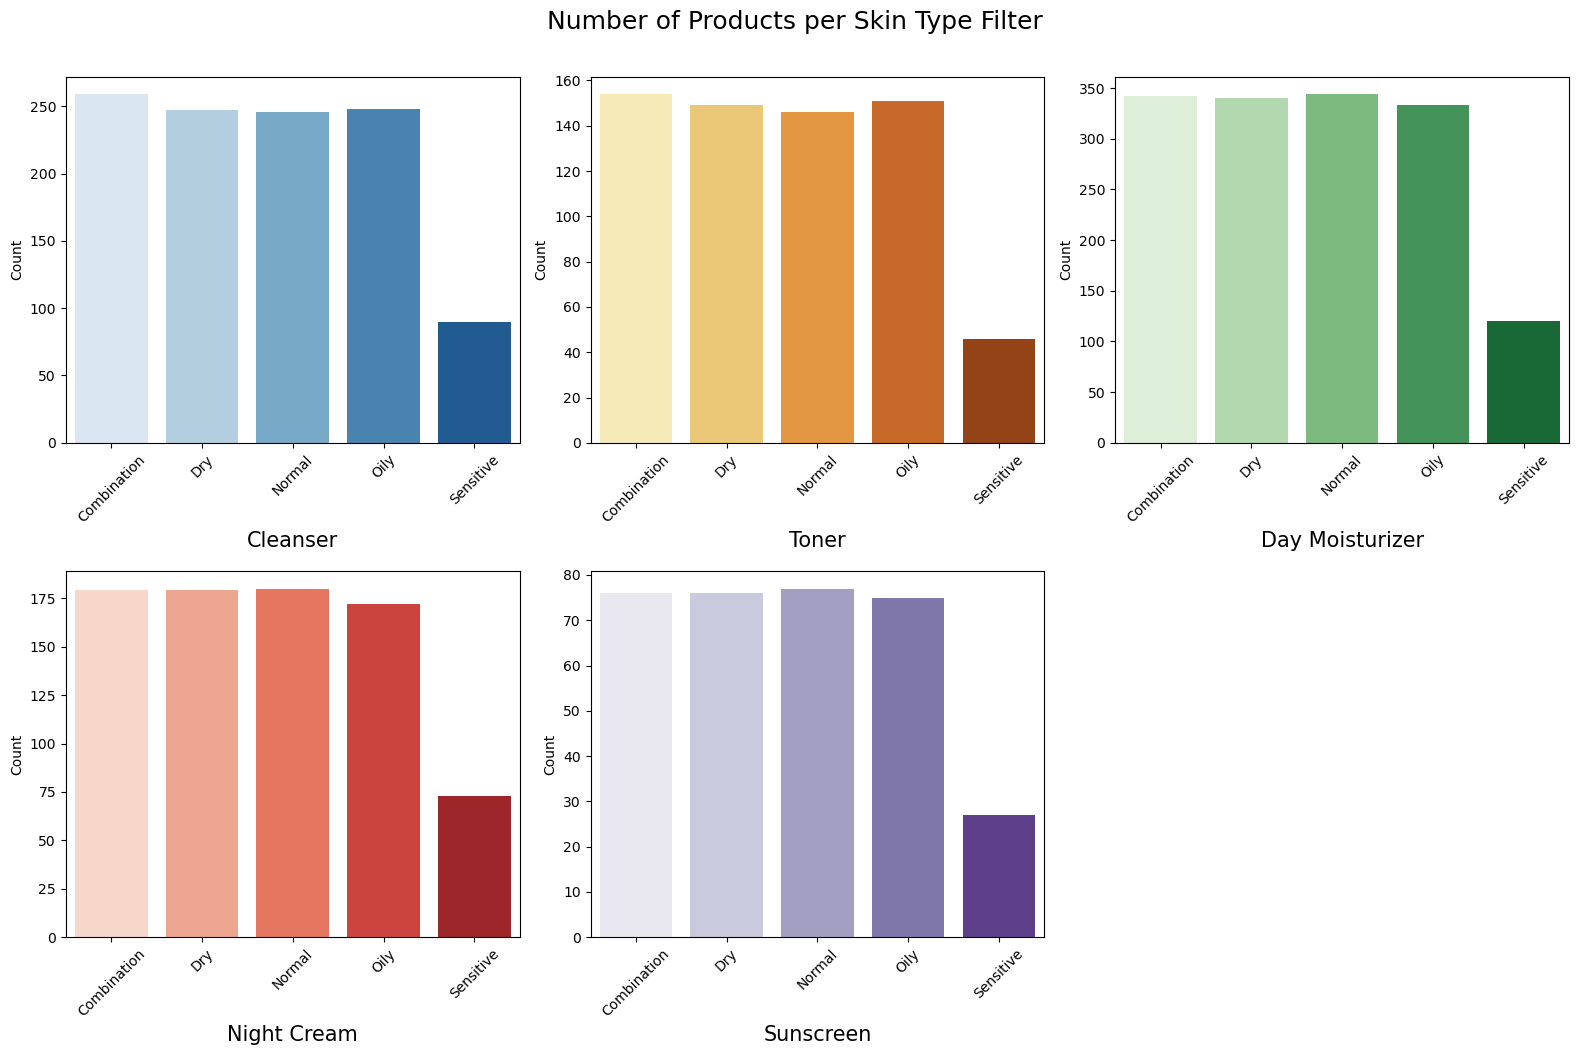

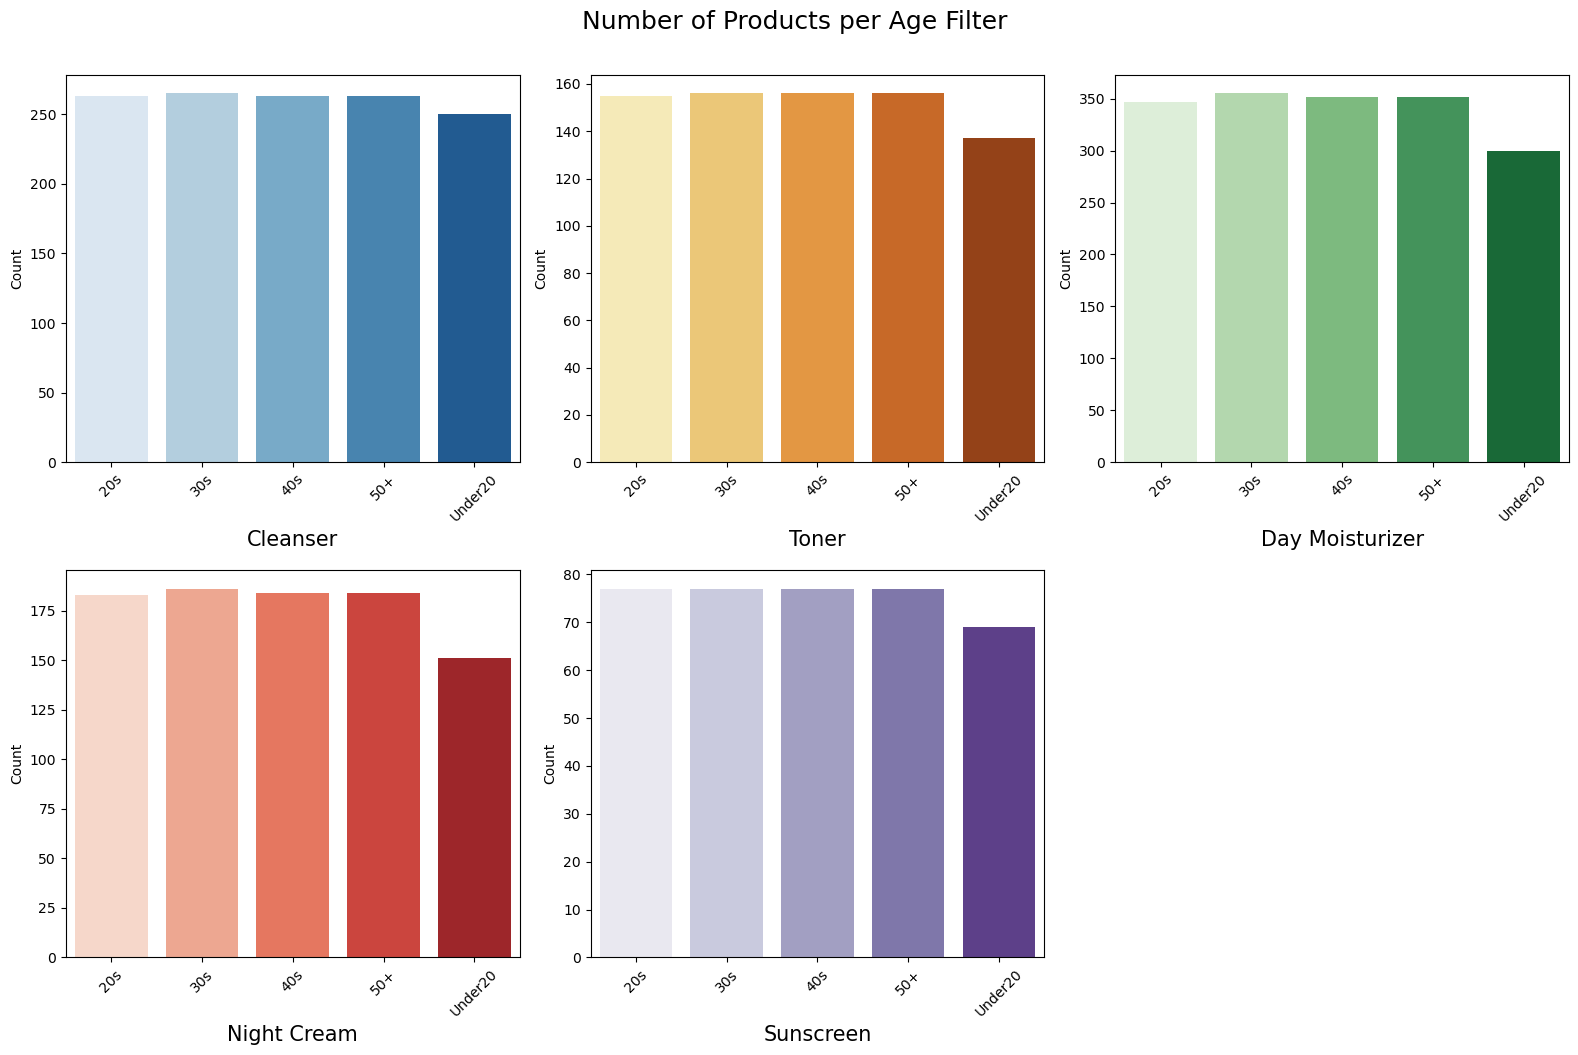

In [14]:
subplot_by_tags(filter_skin_type, 'Number of Products per Skin Type Filter', 45)
subplot_by_tags(filter_age, 'Number of Products per Age Filter', 45)

In [15]:
print(f'Number of Products in Cleanser dataset: {cleanser.shape[0]}')
print(f'Number of Products in Toner dataset: {toner.shape[0]}')
print(f'Number of Products in Day Moisturizer dataset: {day_moisturizer.shape[0]}')
print(f'Number of Products in Night Cream dataset: {night_cream.shape[0]}')
print(f'Number of Products in Sunscreen dataset: {sunscreen.shape[0]}')

Number of Products in Cleanser dataset: 265
Number of Products in Toner dataset: 156
Number of Products in Day Moisturizer dataset: 355
Number of Products in Night Cream dataset: 186
Number of Products in Sunscreen dataset: 77


From the plots above, we can see that most of the products are tagged with almost every filter type under Skin Type and Age.
Except for `Sensitive` tag, where only about half of the products in each category has that tag. 
As well as `Under20` tag, which is only slightly less than the total number of products in each category. 

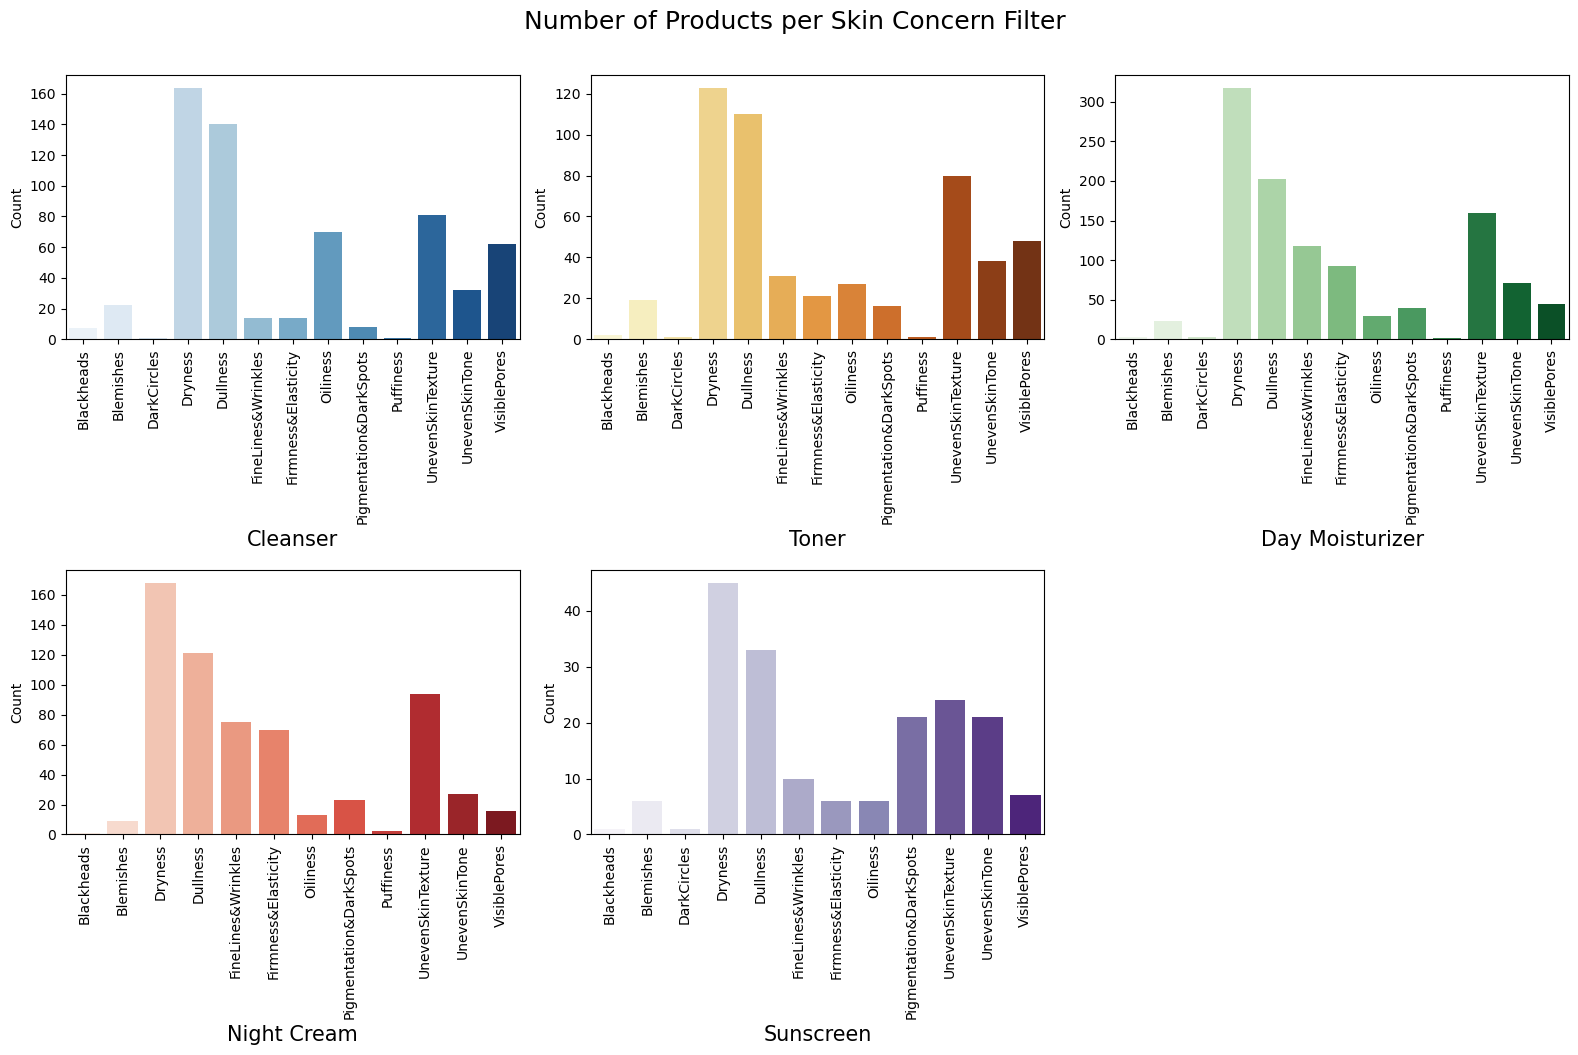

In [16]:
subplot_by_tags(filter_skin_concerns, 'Number of Products per Skin Concern Filter', 90)

From the plots above, more variation in tags can be observed for Skin Concern filters. Across all categories, `Dryness` is the most popular tag that makes up half or more of the total number of products per category, followed by `Dullness`. This is interesting because one would assume that in Singapore, customers would be looking to tackle `oiliness` instead of `dryness` given the weather and climate.

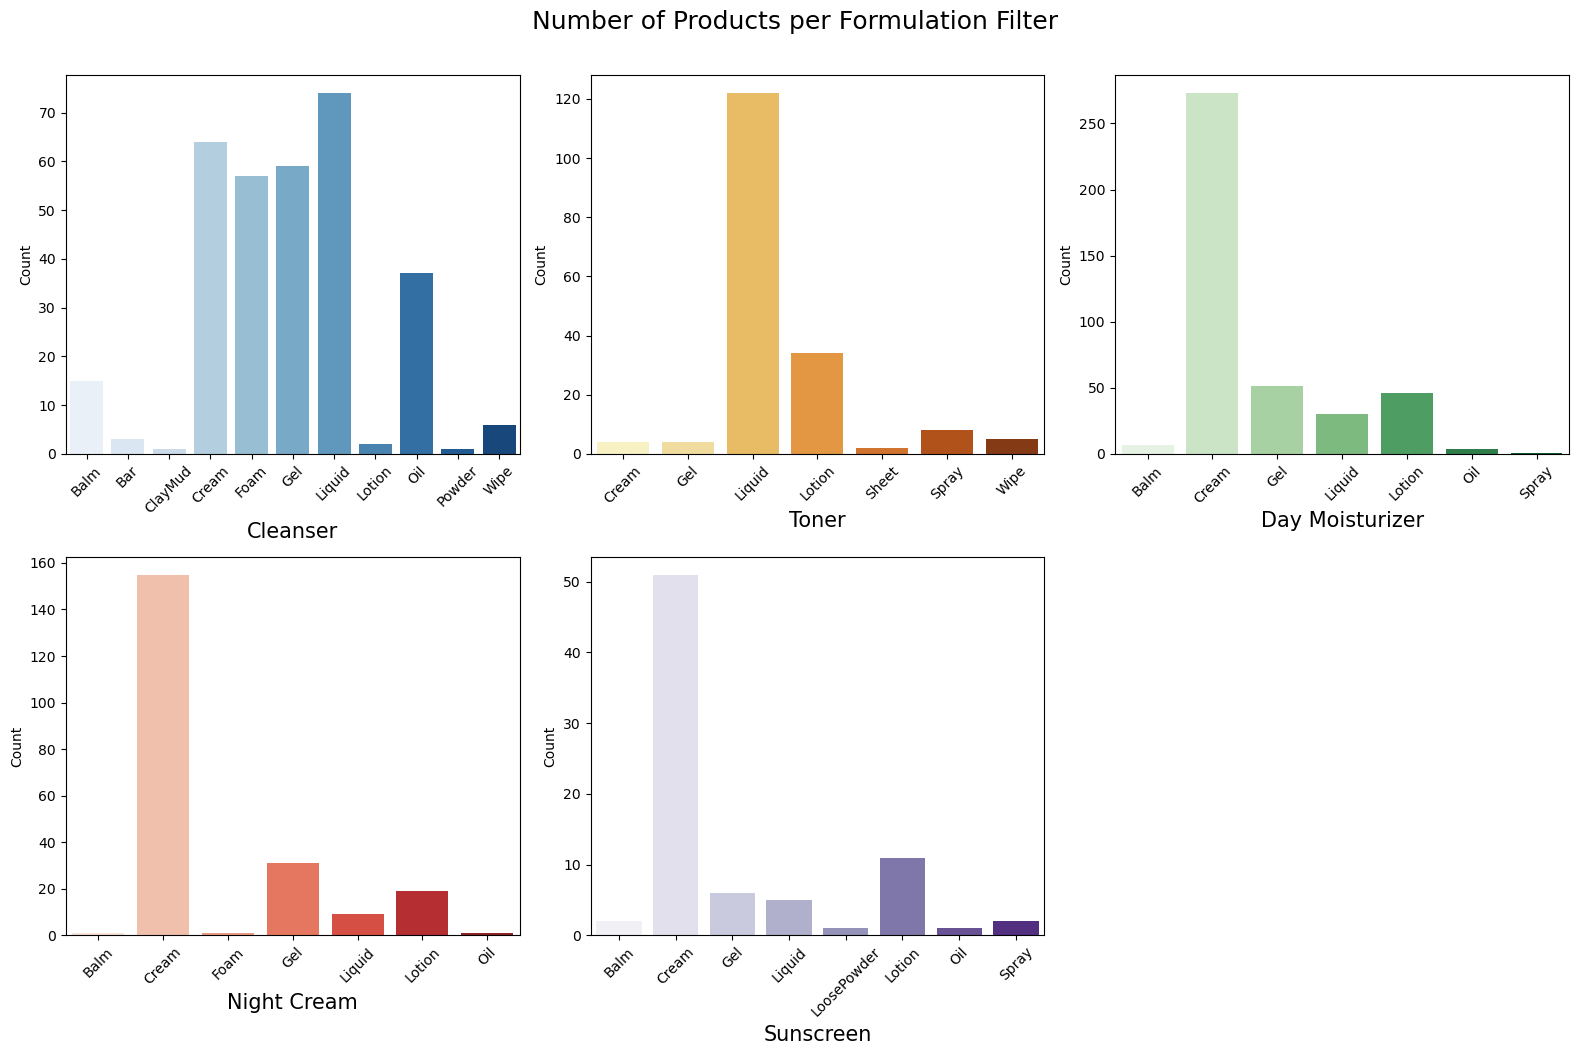

In [17]:
subplot_by_tags(filter_formula, 'Number of Products per Formulation Filter', 45)

Formulation plots above have the largest variations compared to the other 3 filter types. Across the categories, _`Cream`_ is the most popular tag for `Day Moisturizer`, `Night Cream` and `Sunscreen`. While _`Liquid`_ is the most popular tag for `Cleanser` and `Toner`.

### Conclusion 
I will take into consideration the variations in filter tags for each filter type when building my profile-based recommender in the next notebook.<br>
Since `Skin type` and `Age` filter types have the least variation, I will assign a lower weight to them and a higher weight to `Skin concerns` and `Formulation` 

In [18]:
# Export datasets
dummified_cleanser.to_csv('../data/dummified_cleanser.csv', index = True)
dummified_toner.to_csv('../data/dummified_toner.csv', index = True)
dummified_day_moisturizer.to_csv('../data/dummified_day_moisturizer.csv', index = True)
dummified_night_cream.to_csv('../data/dummified_night_cream.csv', index = True)
dummified_sunscreen.to_csv('../data/dummified_sunscreen.csv', index = True)